In [21]:
# Importing the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization, ReLU
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

from sklearn.metrics import classification_report

tf.random.set_seed(23)

import os
import cv2
import random
import warnings
warnings.filterwarnings('ignore')

In [22]:
train_path = '/kaggle/input/chest-bone-x-ray-image-data'
img_width,img_height,channel = 96,96,3

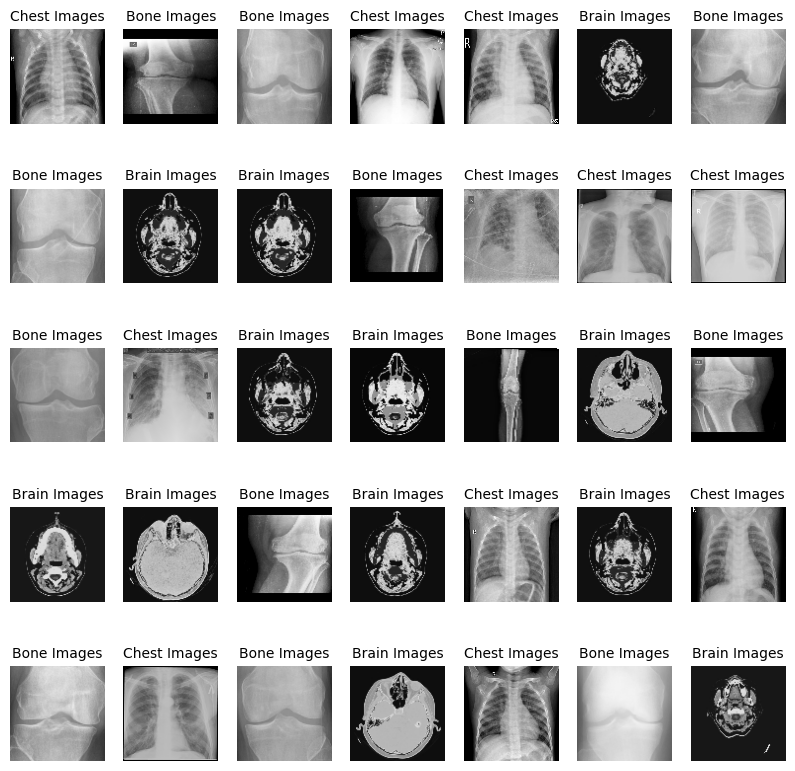

In [32]:
import os
import cv2
import random

classes = ['Bone Images', 'Chest Images', 'Brain Images']

def import_data(dataset, path, categories):
    for i in categories:
        full_path = os.path.join(path, i)
        label = categories.index(i)
        for j in os.listdir(full_path):
            try:
                # Read image in grayscale (black & white)
                img = cv2.imread(os.path.join(full_path, j), cv2.IMREAD_GRAYSCALE)
                
                # Resize image
                img_resized = cv2.resize(img, (img_width, img_height))
                img_resized = cv2.cvtColor(img_resized, cv2.COLOR_GRAY2RGB)
                # Append image and label
                dataset.append([img_resized, label])
            except :
                pass
    random.shuffle(dataset)
    return dataset

# creating the dataset

train_df = []
import_data(train_df,train_path,classes)
train_df = pd.DataFrame(train_df,columns=['image','label'])
train_stack = np.stack(train_df.image)

# Images,
plt.figure(figsize=(10,10))
for i in range(35):
    plt.subplot(5,7,i+1)
    plt.imshow(train_df.image[i])
    plt.title(classes[train_df.label[i]],size=10)
    plt.axis('off')


In [33]:
from tensorflow.keras.applications import  VGG19
#vgg19-------------------------------------------------->
vgg19 = VGG19(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

vgg19.trainable = False

In [34]:
# let's build and train the model 
model_1 = Sequential()
model_1.add(vgg19)
#ann layers
model_1.add(layers.Flatten())

model_1.add(layers.BatchNormalization())
model_1.add(layers.Dense(units=128,activation='relu', kernel_regularizer = keras.regularizers.l2(0.04)))
model_1.add(layers.Dropout(0.5))

model_1.add(layers.BatchNormalization())
model_1.add(layers.Dense(units=128,activation='relu', kernel_regularizer = keras.regularizers.l2(0.04)))
model_1.add(layers.Dropout(0.5))

#no of classes is 3
model_1.add(layers.Dense(units=3,activation='softmax'))

model_1.compile(optimizer=Adam(learning_rate=0.0007), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

model_1.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 227ms/step - accuracy: 0.6829 - loss: 14.4678 - val_accuracy: 0.9944 - val_loss: 10.2439
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.9661 - loss: 9.4633 - val_accuracy: 1.0000 - val_loss: 6.7895
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.9948 - loss: 6.2320 - val_accuracy: 1.0000 - val_loss: 4.4938
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.9962 - loss: 4.1410 - val_accuracy: 1.0000 - val_loss: 3.0168
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.9985 - loss: 2.7821 - val_accuracy: 1.0000 - val_loss: 2.0723
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 1.0000 - loss: 1.9059 - val_accuracy: 1.0000 - val_loss: 1.4553
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 1.0000 - loss: 1.3308 - val_accuracy: 1.0000 - val_loss: 1.0519
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 1.0000 - loss: 0.9496 - val_accuracy: 1.0000

<Axes: title={'center': 'VGG19'}>

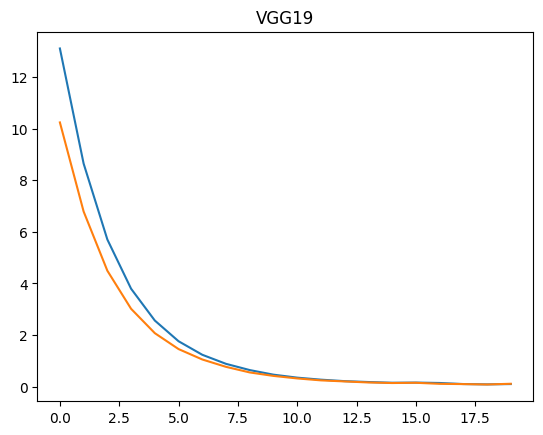

In [35]:
plt.title('VGG19')
sns.lineplot(model_1.history.history['loss'])
sns.lineplot(model_1.history.history['val_loss'])

### So our model is performing great on training and validation data. So now we will use this model to classify between bone and xray images.

In [36]:
model_1.save("Bone_Chest_Brain_Classifier_model.h5")